## Parte 1: Exploratória
## Goal 7 - Garantir o acesso a energia acessível, confiável, sustentável e moderna para todos
O objetivo de desenvolvimento sustentável escolhido foi o 7, que diz garantir o acesso a energia acessível, confiável, sustentável e moderna para todos. A eletricidade é algo básico para inserção no mundo moderno e tão essencial no dia a dia, incomparável com qualquer outra invenção, considerando até que a revolução tecnológica só foi possível por conta de sua da presença. 
Algo indispensável em nossas vidas, estando presente desde a iluminação, aquecimento, fins médicos, uso de eletrodomésticos, computadores, até sistemas de transporte público e muitos outros.
O número de pessoas sem acesso a eletricidade foi um fator que chamou atenção, o que levou ao indicador escolhido, o acesso a energia elétrica. O objetivo é diretamente relacionado ao indicador uma vez que o próprio objetivo é garantir o acesso de todos a energia confiável, sustentável e moderna.
A seguir, segue a análise realizada, utilizando os dados do World Bank (https://databank.worldbank.org/source/sustainable-energy-for-all#) com base em 3 países, a saber, Brasil, Alemanha e Moçambique.

In [154]:
import pandas as pd

# df = pd.read_csv('dados/SDG_csv/'+ 'SDGData' +'.CSV', sep=',', encoding='UTF-8', decimal='.', skiprows=0)
df = pd.read_csv('dados/Data_Extract_From_Sustainable_Energy_for_All/'+ '6d90deca-5693-43c3-8e1f-664a61b7c0db_Data' +'.CSV', sep=',', encoding='UTF-8', decimal='.', skiprows=0)
df.head()

,Country Name,Country Code,Time,Time Code,Access to Clean Fuels and Technologies for cooking (% of total population) [2.1_ACCESS.CFT.TOT],Access to electricity (% of rural population with access) [1.2_ACCESS.ELECTRICITY.RURAL],Access to electricity (% of total population) [1.1_ACCESS.ELECTRICITY.TOT],Access to electricity (% of urban population with access) [1.3_ACCESS.ELECTRICITY.URBAN],Energy intensity level of primary energy (MJ/2011 USD PPP) [6.1_PRIMARY.ENERGY.INTENSITY],Renewable electricity output (GWh) [4.1.2_REN.ELECTRICITY.OUTPUT],Renewable electricity share of total electricity output (%) [4.1_SHARE.RE.IN.ELECTRICITY],Renewable energy consumption (TJ) [3.1_RE.CONSUMPTION],Renewable energy share of TFEC (%) [2.1_SHARE.TOTAL.RE.IN.TFEC],Total electricity output (GWh) [4.1.1_TOTAL.ELECTRICITY.OUTPUT],Total final energy consumption (TFEC) (TJ) [1.1_TOTAL.FINAL.ENERGY.CONSUM]
0,Brazil,BRA,1997.0,YR1997,..,68.817801,93.354139,99.056926,3.94084953998611,286355,92.9778363670604,2405843,43.7251083730704,307982,5502200.199192
1,Brazil,BRA,1998.0,YR1998,..,72.778247,94.193812,99.137016,4.0217825990965,298979,92.9233437348484,2491751,43.8615767414815,321748,5680942.604244
2,Brazil,BRA,1999.0,YR1999,..,75.436121,94.762960,99.186252,4.09373895058941,301368,90.0369268275195,2559594,44.0972758704006,334716,5804426.576196
3,Brazil,BRA,2000.0,YR2000,86.91,74.9041610654805,94.466568,98.998169,3.94784572124322,312249,89.4927058553782,2504059,42.7987739937361,348910,5850772.735608
4,Brazil,BRA,2001.0,YR2001,87.89,77.62953,96.016528,99.215119,3.9512174689924,276891,84.2874450546105,2428426,41.4778788144924,328508,5854749.73506


In [155]:
df = df[['Country Name', 'Time', 'Access to electricity (% of total population) [1.1_ACCESS.ELECTRICITY.TOT]']]
df = df.rename({'Country Name' : 'Nome do país', 'Time' : 'Ano', 'Access to electricity (% of total population) [1.1_ACCESS.ELECTRICITY.TOT]' : 'Acesso à eletricidade (%)'}, axis='columns')
df.head()

,Nome do país,Ano,Acesso à eletricidade (%)
0,Brazil,1997.0,93.354139
1,Brazil,1998.0,94.193812
2,Brazil,1999.0,94.762960
3,Brazil,2000.0,94.466568
4,Brazil,2001.0,96.016528


In [156]:
df_bra = df.iloc[range(0,20)]
df_ger = df.iloc[range(20,40)]
df_moz = df.iloc[range(40,60)]


In [157]:
df_bra = df_bra[['Ano', 'Acesso à eletricidade (%)']]
df_bra = df_bra.rename({'Acesso à eletricidade (%)' : 'Acesso à eletricidade no Brasil (%)'}, axis='columns')

df_ger = df_ger[['Ano', 'Acesso à eletricidade (%)']]
df_ger = df_ger.rename({'Acesso à eletricidade (%)' : 'Acesso à eletricidade na Alemanha (%)'}, axis='columns')

df_moz = df_moz[['Ano', 'Acesso à eletricidade (%)']]
df_moz = df_moz.rename({'Acesso à eletricidade (%)' : 'Acesso à eletricidade em Moçambique (%)'}, axis='columns')

In [158]:
## https://stackoverflow.com/questions/23668427/pandas-three-way-joining-multiple-dataframes-on-columns
df = df_bra.merge(df_ger,on='Ano').merge(df_moz,on='Ano')
df.head()

,Ano,Acesso à eletricidade no Brasil (%),Acesso à eletricidade na Alemanha (%),Acesso à eletricidade em Moçambique (%)
0,1997.0,93.354139,100.0,6.600000
1,1998.0,94.193812,100.0,4.548946
2,1999.0,94.762960,100.0,5.633479
3,2000.0,94.466568,100.0,6.695059
4,2001.0,96.016528,100.0,5.700000


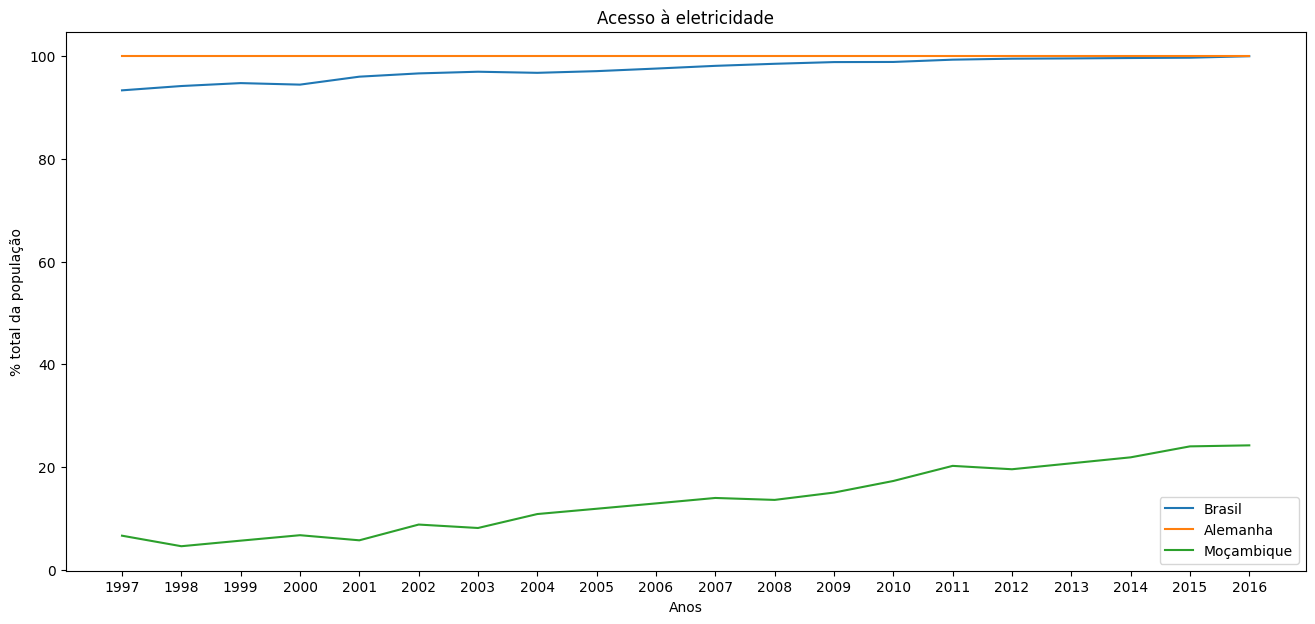

In [159]:
import matplotlib.pyplot as plt
# import seaborn as sns

plt.style.use('default')
plt.figure(figsize=(16,7))

plt.plot(df['Ano'], df['Acesso à eletricidade no Brasil (%)'])
plt.plot(df['Ano'], df['Acesso à eletricidade na Alemanha (%)'])
plt.plot(df['Ano'] ,df['Acesso à eletricidade em Moçambique (%)'])

plt.xticks(df['Ano'])
plt.legend(['Brasil', 'Alemanha', 'Moçambique'])
plt.xlabel('Ano')
plt.ylabel('% total da população')
plt.title('Acesso à eletricidade')
plt.xlabel('Anos')
plt.show()

In [160]:
df = df.set_index(df['Ano'])
df = df[ ['Acesso à eletricidade no Brasil (%)', 'Acesso à eletricidade na Alemanha (%)', 'Acesso à eletricidade em Moçambique (%)'] ]
df.head()

,Acesso à eletricidade no Brasil (%),Acesso à eletricidade na Alemanha (%),Acesso à eletricidade em Moçambique (%)
Ano,,,
1997.0,93.354139,100.0,6.600000
1998.0,94.193812,100.0,4.548946
1999.0,94.762960,100.0,5.633479
2000.0,94.466568,100.0,6.695059
2001.0,96.016528,100.0,5.700000


## Parte 2: Correlações 
O indicador escolhido foi a mortalidade de crianças de até 5 anos. Como hipótese temos, que quanto maior o número de pessoas com acesso a eletricidade, memor será a taxa de mortalidade. 


In [161]:
# APS_cdados_Insper\dados\Data_Extract_From_Sustainable_Development_Goals_(SDGs)\e8792a52-f69a-48e7-a403-715479382981_Data.csv
saude = pd.read_csv('dados/Data_Extract_From_Sustainable_Development_Goals_(SDGs)/'+ 'e8792a52-f69a-48e7-a403-715479382981_Data' +'.CSV', sep=',', encoding='UTF-8', decimal='.', skiprows=0)
saude.head()

,Country Name,Country Code,Series Name,Series Code,2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],2006 [YR2006],...,2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020]
0,Brazil,BRA,"Maternal mortality ratio (modeled estimate, pe...",SH.STA.MMRT,68,69,70,71,71,72,...,61,60,61,62,63,62,60,..,..,..
1,Brazil,BRA,"Mortality rate, under-5 (per 1,000 live births)",SH.DYN.MORT,32.5,30.4,28.4,26.5,24.8,23.2,...,17.9,17.2,16.7,16.3,15.9,16.7,15.4,15.2,14.9,14.7
2,Brazil,BRA,"Mortality rate, neonatal (per 1,000 live births)",SH.DYN.NMRT,17.6,16.7,15.8,15,14.2,13.5,...,10.7,10.3,10,9.7,9.5,10,9.3,9.2,8.9,8.7
3,Brazil,BRA,Number of people spending more than 10% of hou...,SH.UHC.OOPC.10.TO,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..
4,Brazil,BRA,Proportion of population spending more than 10...,SH.UHC.OOPC.10.ZS,..,..,..,..,..,..,...,..,..,..,..,..,..,11.8118953704834,..,..,..


In [162]:
saude = saude[ saude['Series Name'] == 'Mortality rate, under-5 (per 1,000 live births)']
saude_bra = saude[ saude['Country Name'] == 'Brazil' ]

saude_ger = saude[ saude['Country Name'] == 'Germany' ]

saude_moz = saude[ saude['Country Name'] == 'Mozambique' ]


In [163]:
saude_bra = saude_bra.T
saude_ger = saude_ger.T
saude_moz = saude_moz.T



In [164]:
saude_bra = saude_bra.iloc[4:]
saude_ger = saude_ger.iloc[4:]
saude_moz = saude_moz.iloc[4:]


In [165]:
saude_bra = saude_bra.rename({1 : 'Taxa de mortalidade até 5 anos, no Brasil'}, axis='columns')
saude_ger = saude_ger.rename({8 : 'Taxa de mortalidade até 5 anos, na Alemanha'}, axis='columns')
saude_moz = saude_moz.rename({15 : 'Taxa de mortalidade até 5 anos, em Moçambique'}, axis='columns')


In [166]:
df_saude = pd.concat((saude_bra, saude_ger, saude_moz), join='outer', axis=1)

df_saude.tail()

,"Taxa de mortalidade até 5 anos, no Brasil","Taxa de mortalidade até 5 anos, na Alemanha","Taxa de mortalidade até 5 anos, em Moçambique"
2016 [YR2016],16.7,3.9,80.4
2017 [YR2017],15.4,3.9,78
2018 [YR2018],15.2,3.8,75.6
2019 [YR2019],14.9,3.7,72.9
2020 [YR2020],14.7,3.7,70.6


In [167]:
anos = pd.Series(list(range(2001, 2021)))
df_saude = df_saude.set_index(anos)

df_saude.tail()

,"Taxa de mortalidade até 5 anos, no Brasil","Taxa de mortalidade até 5 anos, na Alemanha","Taxa de mortalidade até 5 anos, em Moçambique"
2016,16.7,3.9,80.4
2017,15.4,3.9,78
2018,15.2,3.8,75.6
2019,14.9,3.7,72.9
2020,14.7,3.7,70.6


In [168]:
df_saude['Taxa de mortalidade até 5 anos, no Brasil'] = pd.to_numeric(df_saude['Taxa de mortalidade até 5 anos, no Brasil'])
df_saude['Taxa de mortalidade até 5 anos, na Alemanha'] = pd.to_numeric(df_saude['Taxa de mortalidade até 5 anos, na Alemanha'])
df_saude['Taxa de mortalidade até 5 anos, em Moçambique'] = pd.to_numeric(df_saude['Taxa de mortalidade até 5 anos, em Moçambique'])


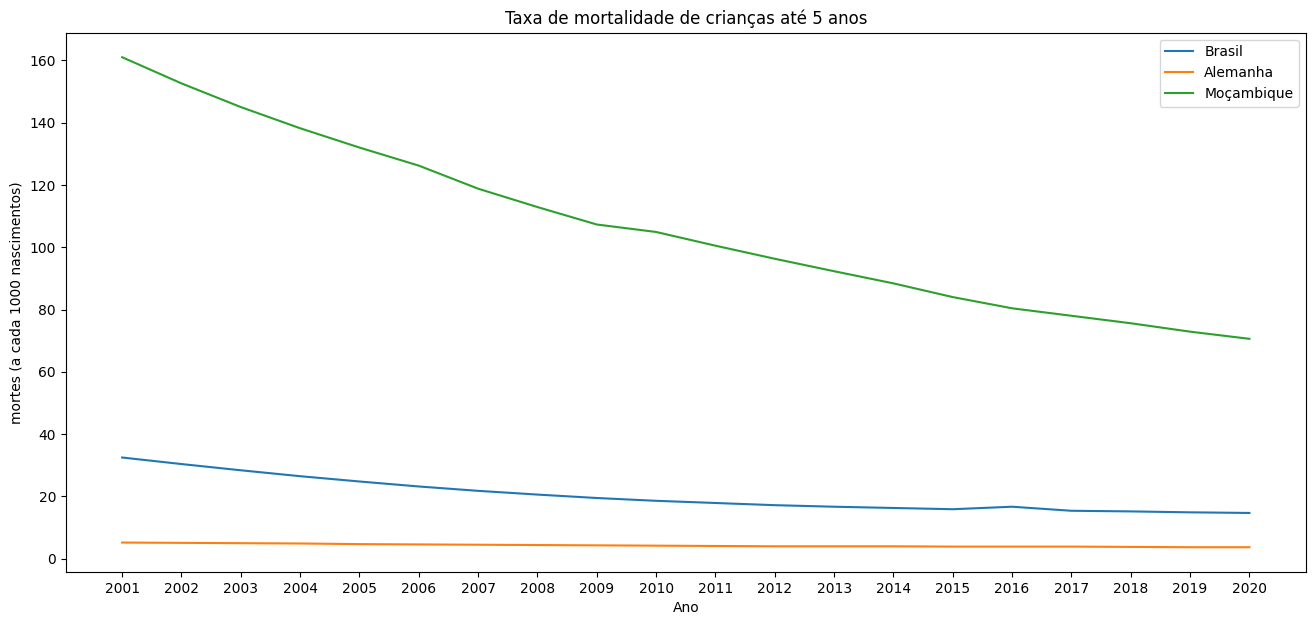

In [169]:
plt.style.use('default')
plt.figure(figsize=(16,7))

plt.plot(df_saude['Taxa de mortalidade até 5 anos, no Brasil'])
plt.plot(df_saude['Taxa de mortalidade até 5 anos, na Alemanha'])
plt.plot(df_saude['Taxa de mortalidade até 5 anos, em Moçambique'])

plt.xticks(df_saude.index)
plt.legend(['Brasil', 'Alemanha', 'Moçambique'])
plt.xlabel('Ano')
plt.ylabel('mortes (a cada 1000 nascimentos)')
plt.title('Taxa de mortalidade de crianças até 5 anos')
plt.show()

### Comparação dos gráficos (da parte 1 e parte 2)

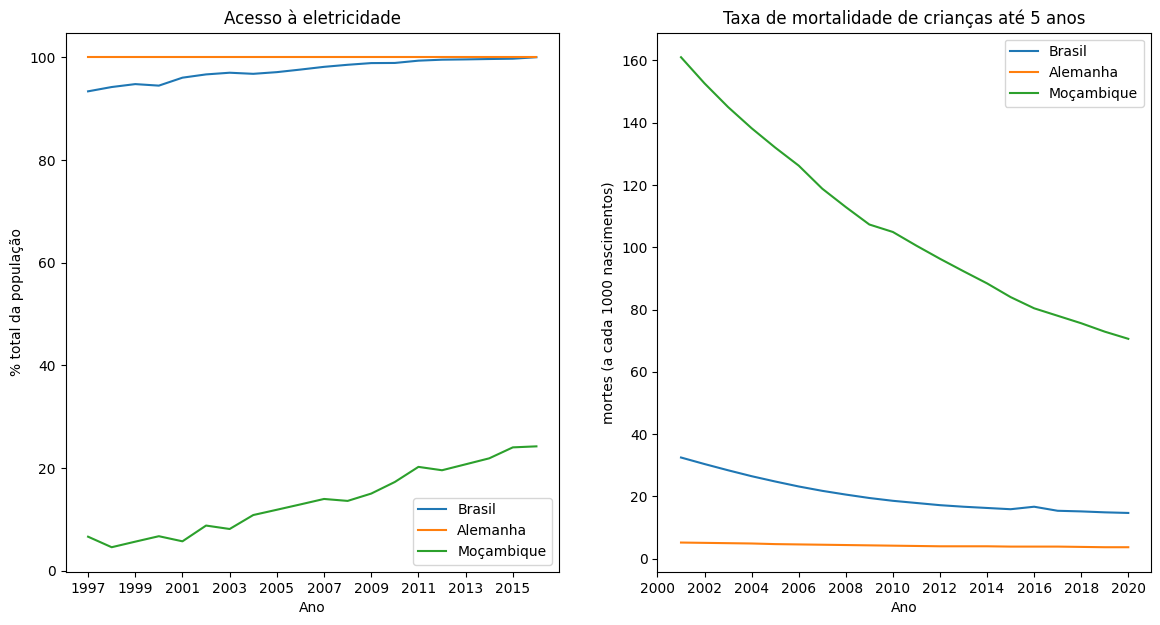

In [170]:
plt.style.use('default')
plt.figure(figsize=(14,7))
anos_saude = list(range(2000, 2021, 2))
anos_eletricidade = list(range(1997, 2017, 2))


plt.subplot(1, 2, 1)

plt.plot(df['Acesso à eletricidade no Brasil (%)'])
plt.plot(df['Acesso à eletricidade na Alemanha (%)'])
plt.plot(df['Acesso à eletricidade em Moçambique (%)'])

plt.xticks(anos_eletricidade)
plt.legend(['Brasil', 'Alemanha', 'Moçambique'])
plt.xlabel('Ano')
plt.ylabel('% total da população')
plt.title('Acesso à eletricidade')
plt.xlabel('Ano')

plt.subplot(1, 2, 2)

plt.plot(df_saude['Taxa de mortalidade até 5 anos, no Brasil'])
plt.plot(df_saude['Taxa de mortalidade até 5 anos, na Alemanha'])
plt.plot(df_saude['Taxa de mortalidade até 5 anos, em Moçambique'])

plt.xticks(anos_saude)
plt.legend(['Brasil', 'Alemanha', 'Moçambique'])
plt.xlabel('Ano')
plt.ylabel('mortes (a cada 1000 nascimentos)')
plt.title('Taxa de mortalidade de crianças até 5 anos')

plt.show()

### Correlação e Covariância entre os dados

In [171]:
df_cor_moz = pd.concat( (df['Acesso à eletricidade em Moçambique (%)'], df_saude['Taxa de mortalidade até 5 anos, em Moçambique']), join='inner', axis = 1)
df_cor_bra = pd.concat( (df['Acesso à eletricidade no Brasil (%)'], df_saude['Taxa de mortalidade até 5 anos, no Brasil']), join='inner', axis = 1)
df_cor_ger = pd.concat( (df['Acesso à eletricidade na Alemanha (%)'], df_saude['Taxa de mortalidade até 5 anos, na Alemanha']), join='inner', axis = 1)

df_cor_ger.head()
# sda_ = pd.concat((sda1, sda2), join='outer', axis=1)
# sda_.head()


,Acesso à eletricidade na Alemanha (%),"Taxa de mortalidade até 5 anos, na Alemanha"
2001.0,100.0,5.2
2002.0,100.0,5.1
2003.0,100.0,5.0
2004.0,100.0,4.9
2005.0,100.0,4.7


##### Correlação e covariância em Moçambique

In [172]:
## correlação
corr_moz = df_cor_moz.corr()
corr_moz

,Acesso à eletricidade em Moçambique (%),"Taxa de mortalidade até 5 anos, em Moçambique"
Acesso à eletricidade em Moçambique (%),1.000000,-0.978918
"Taxa de mortalidade até 5 anos, em Moçambique",-0.978918,1.000000


In [173]:
## covariância
cov_moz = df_cor_moz.cov()
cov_moz

,Acesso à eletricidade em Moçambique (%),"Taxa de mortalidade até 5 anos, em Moçambique"
Acesso à eletricidade em Moçambique (%),33.435441,-142.477401
"Taxa de mortalidade até 5 anos, em Moçambique",-142.477401,633.566667


##### Correlação e covariância no Brasil

In [174]:
corr_bra = df_cor_bra.corr()
corr_bra

,Acesso à eletricidade no Brasil (%),"Taxa de mortalidade até 5 anos, no Brasil"
Acesso à eletricidade no Brasil (%),1.00000,-0.97667
"Taxa de mortalidade até 5 anos, no Brasil",-0.97667,1.00000


In [175]:
cov_bra = df_cor_bra.cov()
cov_bra

,Acesso à eletricidade no Brasil (%),"Taxa de mortalidade até 5 anos, no Brasil"
Acesso à eletricidade no Brasil (%),1.704756,-6.869365
"Taxa de mortalidade até 5 anos, no Brasil",-6.869365,29.018500


##### Correlação e covariância na Alemanha

In [176]:
corr_ger = df_cor_ger.corr()
corr_ger

,Acesso à eletricidade na Alemanha (%),"Taxa de mortalidade até 5 anos, na Alemanha"
Acesso à eletricidade na Alemanha (%),NaN,NaN
"Taxa de mortalidade até 5 anos, na Alemanha",NaN,1.0


In [177]:
cov_ger = df_cor_ger.cov()
cov_ger

,Acesso à eletricidade na Alemanha (%),"Taxa de mortalidade até 5 anos, na Alemanha"
Acesso à eletricidade na Alemanha (%),0.0,0.000000
"Taxa de mortalidade até 5 anos, na Alemanha",0.0,0.199333


Espera-se que os dois indicadores estejam relacionados, uma vez que a falta de acesso a energia podem causar problemas a saúde, desde o armazenamento de alimentos refrigerados, até uso de fogão a lenha, e de acordo com a ONU leva a milhões de mortes por ano por conta de fumaça, além de geladeira a gás, lamparinas a querosene, entre outros. Podemos ter como exemplo concreto, o projeto de lei que foi aprovado (Projeto de Lei 3579/20), que diz que a inclusão do acesso à energia elétrica como item fundamental para promoção da saúde. E apresentam que a falta de energia, leva ao uso de fontes de energia poluentes, que causam e agravam doenças respiratórias, além da liberação de gases que promovem a liberação de gases do efeito estufa.  

Ao analisar a correlação entre os indicadores, os valores apresentados indicam forte correlação inversa, ou seja, os dois estão próximos de um comportamento inversamente proporcional no período considerado, para Moçambique e Brasil (correlção de -0,97). Por outro lado, não foi possível determinar a correlação no caso da Alemanha, tendo em vista que o acesso a energia elétrica não variou durante todo o período considerado (manteve-se em 100%). Isso indica que investimento em infraestrutura (como políticas de acesso a energia elétrica) podem ser efetivas para diminuição da mortalidade infantil em Moçambique e até no Brasil, porém o mesmo não é válido para Alemanha. Desse modo, uma hipótese que pode ser levantada é que, em países em desenvolvimento, a falta de infraestrutura pode ser um fator relevante na taxa de mortalidade, porém, nos países desenvolvidos, investimentos em infraestrutura tem influência irrisória na taxa de mortalidade.


Referência bibliográfica
- https://brasil.un.org/pt-br/130381-acesso-eletricidade-avanca-mas-desigualdade-ainda-e-obstaculo-para-cumprir-meta-de-energia
- https://www.camara.leg.br/noticias/809883-comissao-aprova-inclusao-do-acesso-a-energia-eletrica-como-item-fundamental-para-promocao-da-saude/

Modificação feitas na entrega anterior:


- Nomes nos eixos:	
Título adicionado aos eixos, bem como adequação do título do gráfico para evitar redundância.


